In [1]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\91790\OneDrive\Desktop\OCR_Project


In [2]:
import pytesseract
from PIL import Image
import os

# Set the tesseract path (Windows only, adjust if different)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Use relative path (now that folder is in working directory)
folder_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0"

# OCR on first 5 images
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.lower().endswith(('.jpg', '.png')):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        text = pytesseract.image_to_string(img)
        print(f"{filename}:\n{text.strip()}\n{'-'*50}")
        
        if i >= 4:
            break


In [3]:
import os

# Change this to your actual path
dataset_path = r"C:\Users\YourName\Desktop\OCR_Project\IIIT5K-Word_V3.0"
image_folder = os.path.join(dataset_path, "train")  # assuming images are in 'train' folder
annotation_file = os.path.join(dataset_path, "annotation.txt")


In [4]:
pip install pandas matplotlib pillow easyocr pytesseract Levenshtein torch torchvision


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import easyocr
from tqdm import tqdm
import numpy as np


In [6]:
dataset_path = r"C:\Users\YourName\Desktop\OCR_Project\IIIT5K-Word_V3.0"
annotation_file = os.path.join(dataset_path, "train.txt")  # change to test.txt if needed
image_folder = os.path.join(dataset_path, "train")

In [7]:
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0"


In [8]:
import os
print("Contents:\n", os.listdir(dataset_path))


Contents:
 ['gt.csv', 'IIIT5K']


In [9]:
import os

# Set your actual dataset folder path here
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0"

# List all files in the dataset directory
print("Contents of dataset folder:")
print(os.listdir(dataset_path))


Contents of dataset folder:
['gt.csv', 'IIIT5K']


In [10]:
import os

# Updated path to include 'IIIT5K'
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K"

print("Contents of IIIT5K folder:")
print(os.listdir(dataset_path))


Contents of IIIT5K folder:
['easyocr_models', 'lexicon.txt', 'README', 'test', 'testCharBound.mat', 'testdata.mat', 'train', 'trainCharBound.mat', 'traindata.mat']


In [11]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
import scipy.io
import pandas as pd

# Use 'train' or 'test' version
mat_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K\traindata.mat"
img_folder = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K\train"

# Load .mat file
data = scipy.io.loadmat(mat_path)
print(data.keys())  # See available keys like 'imnames', 'words'


dict_keys(['__header__', '__version__', '__globals__', 'traindata'])


In [13]:
import scipy.io

mat_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K\traindata.mat"
data = scipy.io.loadmat(mat_path)

# Print all keys
print("Keys in .mat file:", data.keys())


Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'traindata'])


In [16]:
# Explore the structure of 'traindata'
data_struct = data['traindata']
print("Shape:", data_struct.shape)
print("Type of elements:", type(data_struct[0][0]))
print("Field names in struct:", data_struct[0][0].dtype)


Shape: (1, 2000)
Type of elements: <class 'numpy.void'>
Field names in struct: [('ImgName', 'O'), ('GroundTruth', 'O'), ('smallLexi', 'O'), ('mediumLexi', 'O')]


In [17]:
import scipy.io
import pandas as pd
import os

# Load the .mat file
mat_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K\traindata.mat"
image_folder = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K\train"

data = scipy.io.loadmat(mat_path)
entries = data['traindata'][0]  # length = 2000

# Extract image names and ground truth
image_names = [entry['ImgName'][0] for entry in entries]
ground_truths = [entry['GroundTruth'][0] for entry in entries]

# Create DataFrame
df = pd.DataFrame({'image_name': image_names, 'text': ground_truths})
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(image_folder, x))

print(df.head())


         image_name     text  \
0  train/1009_2.png      YOU   
1  train/1017_1.png   RESCUE   
2  train/1017_2.png  MISSION   
3  train/1021_1.png     HOME   
4  train/1023_1.png   BORDER   

                                          image_path  
0  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
1  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
2  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
3  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
4  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  


In [18]:
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K"
mat_path = os.path.join(dataset_path, "traindata.mat")

data = scipy.io.loadmat(mat_path)
entries = data['traindata'][0]

image_names = [entry['ImgName'][0] for entry in entries]
ground_truths = [entry['GroundTruth'][0] for entry in entries]

df = pd.DataFrame({'image_name': image_names, 'text': ground_truths})
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(dataset_path, x))  # ← fixed

print(df.head())


         image_name     text  \
0  train/1009_2.png      YOU   
1  train/1017_1.png   RESCUE   
2  train/1017_2.png  MISSION   
3  train/1021_1.png     HOME   
4  train/1023_1.png   BORDER   

                                          image_path  
0  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
1  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
2  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
3  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
4  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  


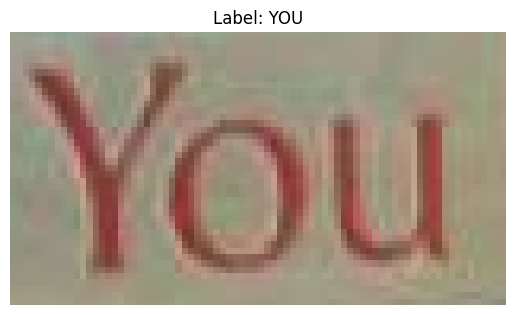

In [19]:
img = Image.open(df.iloc[0]['image_path'])
plt.imshow(img)
plt.title(f"Label: {df.iloc[0]['text']}")
plt.axis('off')
plt.show()


In [20]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import easyocr
import numpy as np
import scipy.io
from Levenshtein import distance as lev_dist

In [21]:
!pip install tqdm
try:
    from tqdm import tqdm
except ImportError:
    print("tqdm module not found. Please install it using: pip install tqdm")
    tqdm = lambda x: x  # fallback dummy tqdm

Defaulting to user installation because normal site-packages is not writeable


In [22]:
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K"
mat_path = os.path.join(dataset_path, "traindata.mat")
data = scipy.io.loadmat(mat_path)
entries = data['traindata'][0]

# Extract image filenames and ground truth labels
image_names = [entry['ImgName'][0] for entry in entries]
ground_truths = [entry['GroundTruth'][0] for entry in entries]

df = pd.DataFrame({'image_name': image_names, 'text': ground_truths})
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(dataset_path, x))

print(df.head())

         image_name     text  \
0  train/1009_2.png      YOU   
1  train/1017_1.png   RESCUE   
2  train/1017_2.png  MISSION   
3  train/1021_1.png     HOME   
4  train/1023_1.png   BORDER   

                                          image_path  
0  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
1  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
2  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
3  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
4  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  


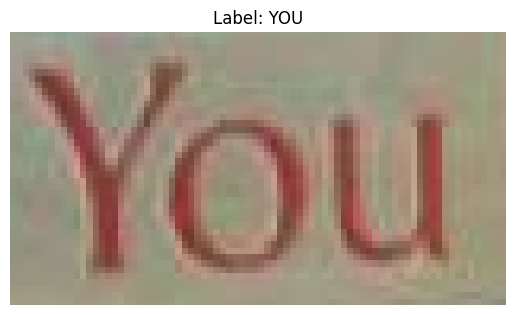

In [23]:
img = Image.open(df.iloc[0]['image_path'])
plt.imshow(img)
plt.title(f"Label: {df.iloc[0]['text']}")
plt.axis('off')
plt.show()

In [24]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  # Adjust if needed
text_tess = pytesseract.image_to_string(df.iloc[0]['image_path'], lang='eng')
print(f"Tesseract OCR Result: {text_tess}")


Tesseract OCR Result: You



In [25]:
def accuracy(gt, pred):
    if not pred.strip(): return 0
    return 1 - lev_dist(gt.lower(), pred.lower()) / max(len(gt), len(pred))

results = []
for i in tqdm(range(25)):
    img_path = df.iloc[i]['image_path']
    gt = df.iloc[i]['text']
    try:
        pred_text = pytesseract.image_to_string(img_path, lang='eng').strip()
        acc = accuracy(gt, pred_text)
        results.append((gt, pred_text, acc))
    except:
        results.append((gt, '', 0))

avg_acc = np.mean([r[2] for r in results])
print(f"\nAverage Tesseract OCR Accuracy on 25 images: {avg_acc:.2f}")

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:09<00:00,  2.61it/s]


Average Tesseract OCR Accuracy on 25 images: 0.53


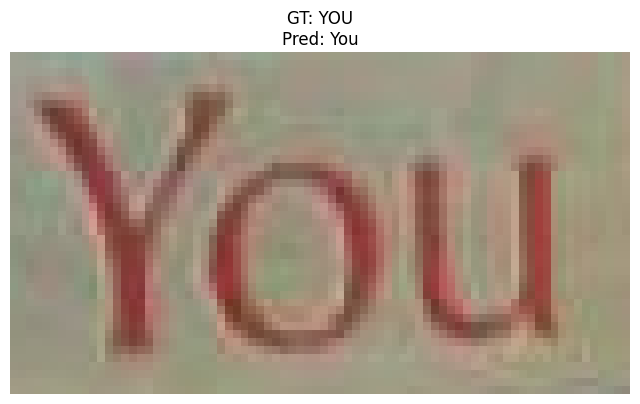

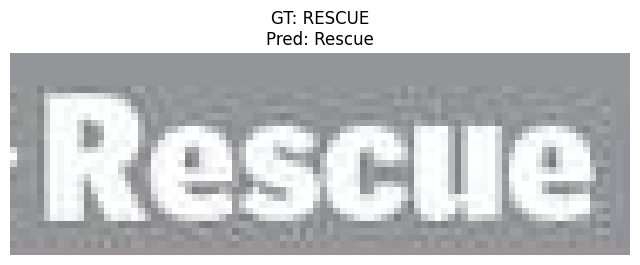

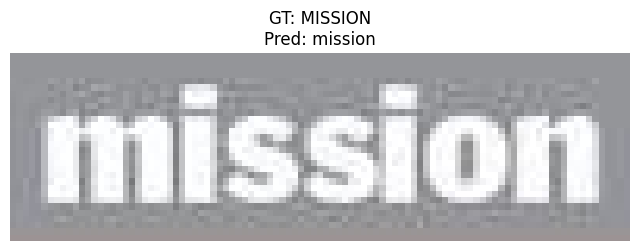

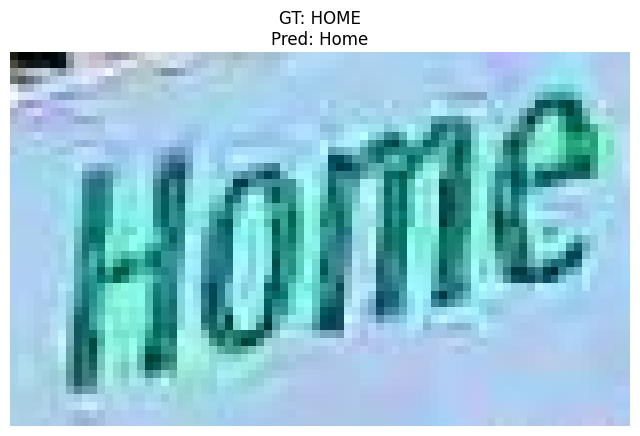

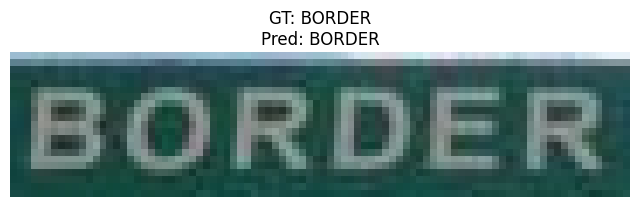

In [26]:
def plot_result(img_path, gt_text, pred_text):
    img = Image.open(img_path)
    plt.figure(figsize=(8, 5))
    plt.imshow(img)
    plt.title(f"GT: {gt_text}\nPred: {pred_text}")
    plt.axis('off')
    plt.show()

for i in range(5):
    plot_result(df.iloc[i]['image_path'], results[i][0], results[i][1])

In [27]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [28]:
!pip install easyocr


Defaulting to user installation because normal site-packages is not writeable


In [29]:
import easyocr
print("EasyOCR version:", easyocr.__version__)


EasyOCR version: 1.7.2


In [30]:
import easyocr
import os
import numpy as np
import pandas as pd
import scipy.io
from tqdm import tqdm
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
from Levenshtein import distance as lev_dist


In [31]:
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K"
mat_path = os.path.join(dataset_path, "traindata.mat")
data = scipy.io.loadmat(mat_path)
entries = data['traindata'][0]

image_names = [entry['ImgName'][0] for entry in entries]
ground_truths = [entry['GroundTruth'][0] for entry in entries]

df = pd.DataFrame({'image_name': image_names, 'text': ground_truths})
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(dataset_path, x))

print(df.head())


         image_name     text  \
0  train/1009_2.png      YOU   
1  train/1017_1.png   RESCUE   
2  train/1017_2.png  MISSION   
3  train/1021_1.png     HOME   
4  train/1023_1.png   BORDER   

                                          image_path  
0  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
1  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
2  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
3  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  
4  C:\Users\91790\OneDrive\Desktop\OCR_Project\II...  


In [32]:
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = ImageOps.invert(img)
    img = img.filter(ImageFilter.MedianFilter())
    img = ImageEnhance.Contrast(img).enhance(2.0)
    img = ImageEnhance.Sharpness(img).enhance(2.0)
    return img


In [33]:
model_dir = os.path.join(dataset_path, "easyocr_models")
os.makedirs(model_dir, exist_ok=True)

required_files = ["craft_mlt_25k.pth", "english_g2.pth"]
missing_files = [f for f in required_files if not os.path.isfile(os.path.join(model_dir, f))]

if missing_files:
    print("❌ EasyOCR model files missing:", ', '.join(missing_files))
    print("Place the following in:", model_dir)
    print("- craft_mlt_25k.pth")
    print("- english_g2.pth")
    print("Download from:")
    print("https://www.jaided.ai/easyocr/modelhub/craft_mlt_25k.pth")
    print("https://www.jaided.ai/easyocr/modelhub/english_g2.pth")
    reader = None
else:
    reader = easyocr.Reader(['en'], gpu=False, model_storage_directory=model_dir, download_enabled=False)



❌ EasyOCR model files missing: craft_mlt_25k.pth, english_g2.pth
Place the following in: C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K\easyocr_models
- craft_mlt_25k.pth
- english_g2.pth
Download from:
https://www.jaided.ai/easyocr/modelhub/craft_mlt_25k.pth
https://www.jaided.ai/easyocr/modelhub/english_g2.pth


In [34]:
import easyocr

# Updated model directory path
model_dir = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\easyocr_models"

# Initialize EasyOCR Reader with offline model location
reader = easyocr.Reader(
    ['en'],
    gpu=False,
    model_storage_directory=model_dir,
    download_enabled=False
)

print("✅ EasyOCR initialized successfully in offline mode.")


Using CPU. Note: This module is much faster with a GPU.


✅ EasyOCR initialized successfully in offline mode.


In [35]:
import numpy as np
import pandas as pd
import scipy.io
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
from tqdm import tqdm
from Levenshtein import distance as lev_dist

# Your dataset location
dataset_path = r"C:\Users\91790\OneDrive\Desktop\OCR_Project\IIIT5K-Word_V3.0\IIIT5K"
mat_path = os.path.join(dataset_path, "traindata.mat")

# Load .mat file
data = scipy.io.loadmat(mat_path)
entries = data['traindata'][0]

# Create DataFrame with image paths and ground truths
image_names = [entry['ImgName'][0] for entry in entries]
ground_truths = [entry['GroundTruth'][0] for entry in entries]
df = pd.DataFrame({'image_name': image_names, 'text': ground_truths})
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(dataset_path, x))

# Preprocessing
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # grayscale
    img = ImageOps.invert(img)  # invert
    img = img.filter(ImageFilter.MedianFilter())
    img = ImageEnhance.Contrast(img).enhance(2.0)
    img = ImageEnhance.Sharpness(img).enhance(2.0)
    return img


In [36]:
def accuracy(gt, pred):
    if not pred.strip(): return 0
    return 1 - lev_dist(gt.lower(), pred.lower()) / max(len(gt), len(pred))


In [37]:
results = []

for i in tqdm(range(25)):  # Use len(df) for full dataset
    img_path = df.iloc[i]['image_path']
    gt = df.iloc[i]['text']
    
    try:
        img = preprocess_image(img_path)
        preds = reader.readtext(np.array(img), detail=0, paragraph=True)
        pred_text = ' '.join(preds) if isinstance(preds, list) else preds
        acc = accuracy(gt, pred_text)
        results.append((gt, pred_text, acc))
    except Exception as e:
        print(f"Error on image {i}: {e}")
        results.append((gt, '', 0))

# Average accuracy
avg_acc = np.mean([r[2] for r in results])
print(f"\n✅ EasyOCR Accuracy on 25 images: {avg_acc:.2f}")


  0%|                                                                                           | 0/25 [00:00<?, ?it/s]C:\Users\91790\AppData\Roaming\Python\Python313\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.61it/s]


✅ EasyOCR Accuracy on 25 images: 0.77


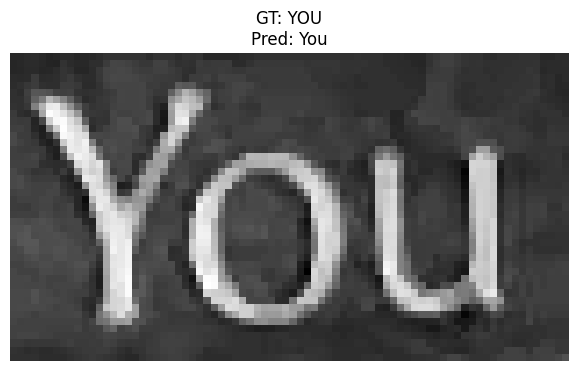

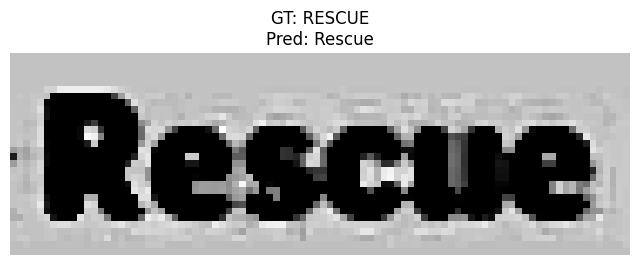

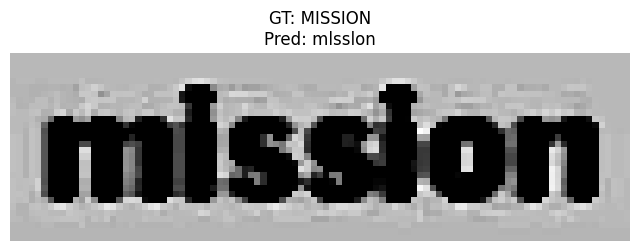

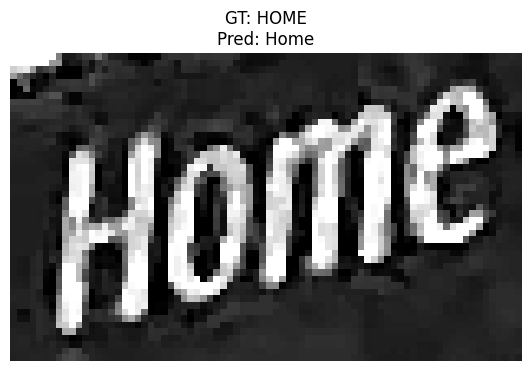

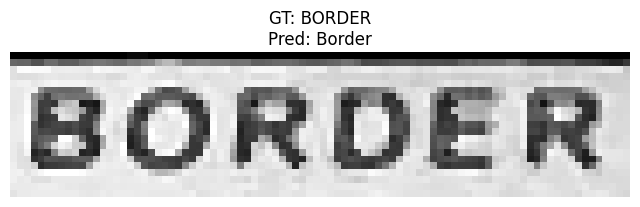

In [38]:
for i in range(5):  # Visualize 5 examples
    img = preprocess_image(df.iloc[i]['image_path'])
    plt.figure(figsize=(8, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"GT: {results[i][0]}\nPred: {results[i][1]}")
    plt.axis('off')
    plt.show()


In [39]:
!pip3 install torch
!pip3 install lmdb pillow torchvision nltk natsort
!pip3 install gdown

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [lmdb]
   ------------- -------------------------- 1/3 [natsort]
   ------------- -------------------------- 1/3 [natsort]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- -

In [40]:
# Define inputs
test="/kaggle/input/iiit5k-words/IIIT5K-Word_V3.0/IIIT5K/test"
train="/kaggle/input/iiit5k-words/IIIT5K-Word_V3.0/IIIT5K/train"
print("Done!")

Done!


In [41]:
# Downloading model repository
import os
import time
import sys
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/clovaai/deep-text-recognition-benchmark.git'
project_name = splitext(basename(git_repo_url))[0]

# Check if the project directory already exists
if not exists(project_name):
    # Clone the Git repository
    os.system(f'git clone  {git_repo_url}')
  
# Add the project directory to the system path
sys.path.append(project_name)
print("Done!")

Done!


In [42]:
# Downloading Pretrained models
import os
import gdown

pretrained_model_path = "./pretrained_model/"

# Create the directory if it doesn't exist
if not os.path.exists(pretrained_model_path):
    os.makedirs(pretrained_model_path)

# List of tuples containing the filename and file ID from Google Drive
links = [
    # Best Accuracy, Note you need to modify model architecture for it
    ("TPS-ResNet-BiLSTM-Attn.pth", "1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9"),
    # Best For Case Sensitive
    ("TPS-ResNet-BiLSTM-Attn-case-sensitive.pth", "1ajONZOgiG9pEYsQ-eBmgkVbMDuHgPCaY")
]

# Loop over each item in the links list
for counter, item in enumerate(links):
    filename = item[0]
    fileid = item[1]

    # Generate the download link using the file ID
    download_link = f"https://drive.google.com/uc?id={fileid}"

    # Set the output file path
    file_path = os.path.join(pretrained_model_path, filename)

    # Download the file using gdown
    gdown.download(download_link, file_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9
From (redirected): https://drive.google.com/uc?id=1b59rXuGGmKne1AuHnkgDzoYgKeETNMv9&confirm=t&uuid=c5306c32-fe4b-4aa3-b26d-aa8562587249
To: C:\Users\91790\OneDrive\Desktop\OCR_Project\pretrained_model\TPS-ResNet-BiLSTM-Attn.pth
100%|███████████████████████████████████████████████████████████████████████████████| 199M/199M [01:51<00:00, 1.77MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1ajONZOgiG9pEYsQ-eBmgkVbMDuHgPCaY
From (redirected): https://drive.google.com/uc?id=1ajONZOgiG9pEYsQ-eBmgkVbMDuHgPCaY&confirm=t&uuid=df66ff3d-a5a6-494e-8ded-9cc5c1f84be2
To: C:\Users\91790\OneDrive\Desktop\OCR_Project\pretrained_model\TPS-ResNet-BiLSTM-Attn-case-sensitive.pth
100%|███████████████████████████████████████████████████████████████████████████████| 199M/199M [01:46<00:00, 1.87MB/s]


In [43]:
# Importing deps
import os
import time
import string
import argparse

import torch
import torch.backends.cudnn as cudnn
import torch.utils.data
import numpy as np
from nltk.metrics.distance import edit_distance

from utils import CTCLabelConverter, AttnLabelConverter, Averager
from dataset import hierarchical_dataset, AlignCollate
from model import Model
print("Done!")

ModuleNotFoundError: No module named 'utils'

In [ ]:
# Defining Model Architecture
!export CUDA_VISIBLE_DEVICES=0
parser = argparse.Namespace()
parser.eval_data=True
parser.benchmark_all_eval='store_true'
parser.workers=4
parser.batch_size=192
parser.saved_model='./pretrained_model/TPS-ResNet-BiLSTM-Attn-case-sensitive.pth'
# parser.saved_model='./pretrained_model/TPS-ResNet-BiLSTM-Attn.pth'

""" Data processing """
parser.batch_max_length=25
parser.imgH=32
parser.imgW=100
parser.rgb='store_true'
parser.character='0123456789abcdefghijklmnopqrstuvwxyz'
parser.sensitive='store_true'
parser.PAD='store_true'

""" Model Architecture """
parser.Transformation='TPS'
parser.FeatureExtraction='ResNet'
parser.SequenceModeling='BiLSTM'
parser.Prediction='Attn'
parser.num_fiducial=20
parser.input_channel=1
parser.output_channel=512
parser.hidden_size=256
parser.num_gpu=0

opt = parser
print(opt)

""" vocab / character number configuration """
opt.character = string.printable[:-6]  # same with ASTER setting (use 94 char).

cudnn.benchmark = True
cudnn.deterministic = True
opt.num_gpu = torch.cuda.device_count()

print(opt.character)

In [ ]:
# If CTC is present we will use CTC otherwise Attention label Converter
if 'CTC' in opt.Prediction:
    converter = CTCLabelConverter(opt.character)
else:
    converter = AttnLabelConverter(opt.character)
opt.num_class = len(converter.character)

print("Done!")

In [ ]:
# Initializing Model
opt.input_channel = 1
model = Model(opt)
print('model input parameters', opt.imgH, opt.imgW, opt.num_fiducial, opt.input_channel, opt.output_channel,
      opt.hidden_size, opt.num_class, opt.batch_max_length, opt.Transformation, opt.FeatureExtraction,
      opt.SequenceModeling, opt.Prediction)
try:
  model = torch.nn.DataParallel(model).cuda()
except:
  model = torch.nn.DataParallel(model)  # Remove .cuda()
  map_location=torch.device('cpu')

In [ ]:
print('loading pretrained model from %s' % opt.saved_model)

In [ ]:
# Loading the model
print('loading pretrained model from %s' % opt.saved_model)
try:
  model.load_state_dict(torch.load(opt.saved_model))
except:
  model.load_state_dict(torch.load(opt.saved_model, map_location=torch.device('cpu')))
opt.experiment_name = '_'.join(opt.saved_model.split('/')[1:])

In [ ]:
os.makedirs(f'./result/{opt.experiment_name}', exist_ok=True)
os.system(f'cp {opt.saved_model} ./result/{opt.experiment_name}/')

In [ ]:
# Defining loss
try:
  # For CUDA
  criterion = torch.nn.CrossEntropyLoss(ignore_index=0).cuda() 
except:
  criterion = torch.nn.CrossEntropyLoss(ignore_index=0)
# model.eval()
print("Done!")

In [ ]:
 # Chosing and displaying test images
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

test_images = [
     (test + "/1002_1.png", "PRIVATE" ),
    (test + "/1002_2.png", "PARKING" ),
    (test + "/1009_1.png", "Salutes" ),
    (test + "/100_1.png", "DOLCE" ),
    (test + "/100_2.png", "GABBANA" ),
    (test + "/27_4.png", "India" ),
    (test + "/69_2.png", "LIKE" ),
]

input_datas = []

n_images = len(test_images)
fig = plt.figure(figsize=(1,4))
fig.suptitle("")
for n, (imagepath, label) in enumerate(test_images):
  # a = fig.add_subplot(np.ceil(n_images/float(1)), 1, n + 1)
  a = fig.add_subplot(int(np.ceil(n_images/float(1))), 1, n + 1)
  image = Image.open(imagepath).convert('L')
  plt.imshow(image, cmap="Purples")
  a.set_title(label)
  input_datas.append((image, label))
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

In [ ]:
from dataset import AlignCollate
_AlignCollate = AlignCollate(imgH=opt.imgH, imgW=opt.imgW)
image_tensors, labels = _AlignCollate(input_datas)

print(labels)

In [ ]:
evaluation_loader = torch.utils.data.DataLoader(
            input_datas, batch_size=2,
            shuffle=False,
            num_workers=int(opt.workers),
            collate_fn=_AlignCollate, pin_memory=True)
print("Created evaluation loader")

In [ ]:

       # Predicting the labels of the chosen images
import torch

max_length = 10
total_correct = 0
total_samples = 0

with torch.no_grad():
    for i, (cpu_images, cpu_texts) in enumerate(evaluation_loader):
        batch_size = cpu_images.size(0)
        length_of_data = 0 + batch_size
        
        # Move data to GPU if available
        if torch.cuda.is_available():
            image = cpu_images.cuda()
            length_for_pred = torch.cuda.IntTensor([max_length] * batch_size)
            text_for_pred = torch.cuda.LongTensor(batch_size, max_length + 1).fill_(0)
             text_for_loss, length_for_loss = converter.encode(cpu_texts)
        else:
            image = cpu_images
            length_for_pred = torch.IntTensor([max_length] * batch_size)
            text_for_pred = torch.LongTensor(batch_size, max_length + 1).fill_(0)
            text_for_loss, length_for_loss = converter.encode(cpu_texts)
        
          
        preds = model(image, text_for_pred, is_train=False)
        preds = preds[:, :text_for_loss.shape[1] - 1, :]
        target = text_for_loss[:, 1:]
        _, preds_index = preds.max(2)
        
        sim_preds = converter.decode(preds_index, length_for_pred)
        sim_preds = list(map(lambda s: s.replace("[s]", "").replace("[GO]", ""), sim_preds))
        
        # Calculate accuracy
        correct = sum([1 for gt, pred in zip(cpu_texts, sim_preds) if gt == pred])
        total_correct += correct
        total_samples += batch_size
        
        print("Exact labels:", cpu_texts)
        print("Predicted   :", sim_preds)
    
    accuracy = total_correct / total_samples
    print("Accuracy    :", accuracy)